# Creation of susceptible data (alt)

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display

## 1. Susceptibles No Smooth

In [2]:
# Labels of the columns from which I want to extract values
labels_desired = ['Accumulated Alive Confirmed in 14 days',
                  'Total Recovered', 'Total Deaths Fixed (sum New Deaths)']

In [3]:
import os
list_files = os.listdir()  # List of files in current directory

import re
files_desired = []

# Loop for obtaining the specific files with the desired information
for file in list_files:
    result = re.findall('[0-9A-Za-z()_]*_Spain.csv$', file)
    if result:
        result = ''.join(result)
        files_desired.append(result)
        
files_desired

['Confirmed_Spain.csv',
 'Deaths_Spain.csv',
 'Recovered_Spain.csv',
 'Susceptibles_Spain.csv']

In [4]:
# Obtaining a list with the arrays of Confirmed, Deaths and Recovered

values = []
for i in range(len(files_desired)):
    df = pd.read_csv(files_desired[i])  # Creation of dataframe for each file
    # Try every label: only 1 is going to match with each file/dataframe
    for j in range(len(labels_desired)):
        try:
            values.append(df[labels_desired[j]].to_numpy())
        except Exception:
            pass

# First is Confirmed, Second is Deaths, Third is Recovered
len(values)

3

In [5]:
# Creation of individual arrays
I = values[0]
D = values[1]
R = values[2]
len(I), len(D), len(R), I[-1], D[-1], R[-1]

(787, 787, 787, 173683, 103973, 11185964)

In [6]:
# Calculation of Total Susceptibles (No Smooth)

population = 47332614  # 1 January 2020 - INE (https://www.ine.es/)
S_total = np.empty(len(I), dtype = object)
for i in range(len(S_total)):
    S_total[i] = population - I[i] - R[i] - D[i]

len(S_total), S_total

(787,
 array([47332614, 47332614, 47332614, 47332614, 47332613, 47332613,
        47332613, 47332613, 47332613, 47332613, 47332613, 47332613,
        47332612, 47332612, 47332612, 47332612, 47332612, 47332612,
        47332612, 47332612, 47332612, 47332612, 47332612, 47332612,
        47332612, 47332612, 47332612, 47332612, 47332608, 47332601,
        47332599, 47332582, 47332569, 47332530, 47332494, 47332449,
        47332392, 47332355, 47332214, 47332114, 47331941, 47331541,
        47330919, 47330337, 47330337, 47327382, 47326223, 47324816,
        47322672, 47320866, 47318704, 47314651, 47312204, 47307240,
        47303846, 47297478, 47292729, 47283099, 47274828, 47266895,
        47259379, 47252504, 47244658, 47236691, 47228496, 47220549,
        47213415, 47206446, 47200968, 47195939, 47190672, 47184394,
        47179392, 47174341, 47169587, 47165783, 47162515, 47160073,
        47154970, 47147666, 47141775, 47140888, 47133940, 47132404,
        47128436, 47124225, 47119590, 4711

## 2. Susceptibles Smooth

In [7]:
# Labels of the columns from which I want to extract values
labels_desired = ['Accumulated Alive Confirmed Smooth in 14 days',
                  'Total Recovered Smooth (7 days)', 'Total Deaths Fixed Smooth (7 days)']

In [8]:
import os
list_files = os.listdir()  # List of files in current directory

import re
files_desired = []

# Loop for obtaining the specific files with the desired information
for file in list_files:
    result = re.findall('[0-9A-Za-z]*_Spain.csv$', file)
    if result:
        result = ''.join(result)
        files_desired.append(result)
        
files_desired

['Confirmed_Spain.csv',
 'Deaths_Spain.csv',
 'Recovered_Spain.csv',
 'Susceptibles_Spain.csv']

In [9]:
# Obtaining a list with the arrays of Confirmed, Deaths and Recovered

values = []
for i in range(len(files_desired)):
    df = pd.read_csv(files_desired[i])  # Creation of dataframe for each file
    # Try every label: only 1 is going to match with each file/dataframe
    for j in range(len(labels_desired)):
        try:
            values.append(df[labels_desired[j]].to_numpy())
        except Exception:
            pass

# First is Confirmed, Second is Deaths, Third is Recovered
len(values)

3

In [10]:
# Creation of individual arrays
I = values[0]
D = values[1]
R = values[2]
len(I), len(D), len(R), I[-1], D[-1], R[-1]

(787, 787, 787, 206250.2857142857, 103773.0, 11122655.57142857)

In [11]:
# Calculation of Total Susceptibles Smooth (7 days average)

population = 47332614  # 1 January 2020 - INE (https://www.ine.es/)
S_smooth = np.empty(len(I), dtype = object)
for i in range(len(S_smooth)):
    S_smooth[i] = population - I[i] - R[i] - D[i]

len(S_smooth), S_smooth

(787,
 array([47332614.0, 47332614.0, 47332614.0, 47332614.0, 47332613.85714286,
        47332613.71428572, 47332613.571428575, 47332613.428571425,
        47332613.28571428, 47332613.14285714, 47332613.0, 47332613.0,
        47332612.85714286, 47332612.71428572, 47332612.571428575,
        47332612.428571425, 47332612.28571428, 47332612.14285714,
        47332612.0, 47332612.0, 47332612.0, 47332612.0, 47332612.0,
        47332612.0, 47332612.0, 47332612.0, 47332612.0, 47332612.0,
        47332611.42857143, 47332609.85714285, 47332608.0,
        47332603.71428572, 47332597.571428575, 47332585.85714286,
        47332569.0, 47332546.28571428, 47332516.42857143,
        47332481.57142857, 47332429.0, 47332364.0, 47332279.85714286,
        47332143.71428572, 47331925.14285714, 47331631.57142857,
        47331343.28571428, 47330653.00000001, 47329811.42857143,
        47328793.57142857, 47327526.57142857, 47326090.428571425,
        47324428.571428575, 47322187.71428571, 47320019.42857143,


## 3. Creation of the final dataset

In [12]:
# Arrays which will form the final dataframe of Susceptibles
iso_code = df.values[:, 0]
continent = df.values[:, 1]
region = df.values[:, 2]
dates = df.values[:, 3]

iso_code[0:5], continent[0:5], region[0:5], dates[0:5]

(array(['ESP', 'ESP', 'ESP', 'ESP', 'ESP'], dtype=object),
 array(['Europe', 'Europe', 'Europe', 'Europe', 'Europe'], dtype=object),
 array(['Spain', 'Spain', 'Spain', 'Spain', 'Spain'], dtype=object),
 array(['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
        '2020-02-01'], dtype=object))

In [13]:
# Array concatenation for building the final dataframe

columns = 6  # Number of columns
X_total = np.empty((len(S_smooth), columns), dtype = object)

for i in range(len(S_smooth)):
    X_total[i] = [iso_code[i], continent[i], region[i], dates[i], S_total[i], S_smooth[i]]
    
X_total.shape, X_total[0:10]

((787, 6),
 array([['ESP', 'Europe', 'Spain', '2020-01-28', 47332614, 47332614.0],
        ['ESP', 'Europe', 'Spain', '2020-01-29', 47332614, 47332614.0],
        ['ESP', 'Europe', 'Spain', '2020-01-30', 47332614, 47332614.0],
        ['ESP', 'Europe', 'Spain', '2020-01-31', 47332614, 47332614.0],
        ['ESP', 'Europe', 'Spain', '2020-02-01', 47332613,
         47332613.85714286],
        ['ESP', 'Europe', 'Spain', '2020-02-02', 47332613,
         47332613.71428572],
        ['ESP', 'Europe', 'Spain', '2020-02-03', 47332613,
         47332613.571428575],
        ['ESP', 'Europe', 'Spain', '2020-02-04', 47332613,
         47332613.428571425],
        ['ESP', 'Europe', 'Spain', '2020-02-05', 47332613,
         47332613.28571428],
        ['ESP', 'Europe', 'Spain', '2020-02-06', 47332613,
         47332613.14285714]], dtype=object))

In [14]:
# Labels of each column of the dataframe
labels = ['ISO_code', 'Continent', 'Country/Region', 'Date', 'Total Susceptibles', 'Susceptibles Smooth (7 days average)']

In [15]:
# Creation of the final dataframe
df_susceptibles = pd.DataFrame(data=X_total, columns=labels)
df_susceptibles

,ISO_code,Continent,Country/Region,Date,Total Susceptibles,Susceptibles Smooth (7 days average)
0,ESP,Europe,Spain,2020-01-28,47332614,4.73326e+07
1,ESP,Europe,Spain,2020-01-29,47332614,4.73326e+07
2,ESP,Europe,Spain,2020-01-30,47332614,4.73326e+07
3,ESP,Europe,Spain,2020-01-31,47332614,4.73326e+07
4,ESP,Europe,Spain,2020-02-01,47332613,4.73326e+07
...,...,...,...,...,...,...
782,ESP,Europe,Spain,2022-03-20,35923141,3.59652e+07
783,ESP,Europe,Spain,2022-03-21,35923141,3.59508e+07
784,ESP,Europe,Spain,2022-03-22,35868994,3.59339e+07
785,ESP,Europe,Spain,2022-03-23,35868994,3.59169e+07


In [16]:
# Export dataframe to a csv file

from pathlib import Path  
filepath = Path('Susceptibles_Spain.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_susceptibles.to_csv(filepath, index=False)

Text(0.5, 1.0, 'Susceptibles Estimated')

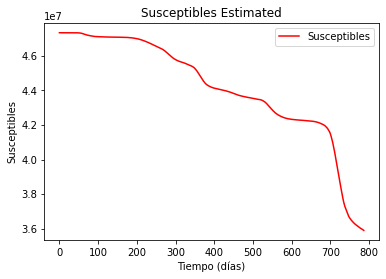

In [17]:
plt.plot(range(0, len(S_smooth)), S_smooth, 'r', label="Susceptibles")
plt.xlabel("Tiempo (días)")
plt.ylabel("Susceptibles")
plt.legend()

plt.title("Susceptibles Estimated")